In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

I will run this on a per image basis. This means that I will load all pictures of one 3d image and store them in one array. I will write this out.

Create the file-names per image

In [2]:
def create_filenames(pic,
                    var_per_image = 5,
                     x_start = 0,
                     x_end = 320,
                     y_start = 50,
                     y_end = 320,
                     z_start = 35,
                     z_end = 256):

    # Initialize lists # 
    names_y = list()
    names_x = list()


    for variation in range(0,var_per_image):
        for x in range(x_start, x_end):
              names_y.append("P" + str(pic) + "_slicex" + str(x) + ".png")
              names_x.append("P" + str(pic) + "_reco_slicex" + str(x) + "-000" + str(variation) + ".png")
        for y in range(y_start, y_end):
            names_y.append("P_" + str(pic) + "_slicey" + str(y) + ".png")
            names_x.append("P_" + str(pic) + "_reco_slicey" + str(y) + "-000" + str(variation) + ".png")
        for z in range(z_start, z_end):
            names_y.append("P_" + str(pic) + "_slicez" + str(z) + ".png")
            names_x.append("P_" + str(pic) + "_reco_slicez" + str(z) + "-000" + str(variation) + ".png")
    return [names_x, names_y]

Load in images

For the following program to run ...
.. it has to be in a folder where there are four subfolders:
    X: containing the spoiled images
    Y: containing the good images
    out: empty directory for the output
    out/

In [25]:
# -------------- #
# Specifications #
# -------------- #
num_pic = 21
path_x = 'X/'
path_y = 'Y/'
start_slice_x = 32
start_slice_y = 32
start_slice_z_1 = 32
start_slice_z_2 = 32

end_slice_x = 320 - start_slice_x
end_slice_y = 320 - start_slice_y
end_slice_z_1 = 320 - start_slice_z_1
end_slice_z_2 = 320 - start_slice_z_2

# -------------- #
#      Loop      #
# -------------- #
for pic in range(10,num_pic):
    # Create the file names
    file_names = create_filenames(pic = pic)
    
    # create the matrices
    shape = (len(file_names[1]),) + (256, 256, 3)
    X = np.empty(shape,dtype = 'uint8')
    Y = np.empty(shape,dtype = 'uint8')
    
   
    # iterate over the file names and and save them to the respective filename
        # if not existing write this to a file and go on silently 
    
    ## X ## 
    # create lists for missing images
    X_missing = list()
    iter = 0
    for x_file in file_names[0]:
        file = cv2.imread(path_x + x_file)
        if (file is None):
            X_missing.append(x_file)
        else:
            if pic <=9:
                slicetype_x = x_file[13]
                slicetype_y_z = x_file[14]
            else:
                slicetype_x = x_file[14]
                slicetype_y_z = x_file[15]
            if (slicetype_x == 'x'):
                if (file.shape == (320,256,3)):
                    X[iter,:,:,:] = file[start_slice_x:end_slice_x,:,:]
                elif (file.shape == (256, 320, 3)):
                    X[iter,:,:,:] = file[:,start_slice_x:end_slice_x,:]
            elif (slicetype_y_z == 'y'):
                if (file.shape == (320,256,3)):
                    X[iter,:,:,:] = file[start_slice_y:end_slice_y,:,:]
                elif (file.shape == (256, 320, 3)):
                    X[iter,:,:,:] = file[:,start_slice_y:end_slice_y,:]
            elif (slicetype_y_z == 'z'):
                X[iter,:,:,:] = file[start_slice_z_1:end_slice_z_1, start_slice_z_2:end_slice_z_2,:]
            else:
                print("STRANGE! pic:",pic, "file:", x_file)
                X_missing.append("STRANGE!!!'" + x_file + "STRANGE!!!")
        iter += 1
        
    # save the image
    X_name = "out/P" + str(pic) + "_X"
    np.save(X_name, X)
    
    # save the missing list
    with open('out/Report/' + 'P' + str(pic) + "_missingX", 'w') as f:
        for item in X_missing:
            f.write("%s\n" % item)
        
    ## Y ##
    Y_missing = list()    
    iter = 0
    for y_file in file_names[1]:
        file = cv2.imread(path_y + y_file)
        if (file is None):
            Y_missing.append(y_file)
        else:
            if pic <=9:
                slicetype_x = y_file[8]
                slicetype_y_z = y_file[9]
            else: 
                slicetype_x = y_file[9]
                slicetype_y_z = y_file[10]
            if (slicetype_x == 'x'):
                if (file.shape == (320,256,3)):
                    Y[iter,:,:,:] = file[start_slice_x:end_slice_x,:,:]
                elif (file.shape == (256, 320, 3)):
                    Y[iter,:,:,:] = file[:,start_slice_x:end_slice_x,:]
            elif (slicetype_y_z == 'y'):
                if (file.shape == (320,256,3)):
                    Y[iter,:,:,:] = file[start_slice_y:end_slice_y,:,:]
                elif (file.shape == (256, 320, 3)):
                    Y[iter,:,:,:] = file[:,start_slice_y:end_slice_y,:]
            elif (slicetype_y_z == 'z'):
                Y[iter,:,:,:] = file[start_slice_z_1:end_slice_z_1, start_slice_z_2:end_slice_z_2,:]
            else:
                print("STRANGE! pic:",pic, "file:", y_file)
                Y_missing.append("STRANGE!!!'" + y_file + "STRANGE!!!")
        iter += 1
    
    # Save the image
    Y_name = "out/P" + str(pic) + "_Y"
    np.save(Y_name, Y)    
    
    # Save the lists of missing images
    with open('out/Report/' + 'P' + str(pic) + "_missingY", 'w') as f:
        for item in Y_missing:
            f.write("%s\n" % item)

In [23]:
"P10_slicex62.png"[9]

'x'

In [24]:
"P_10_slicey293"[10]

'y'

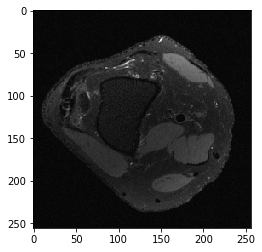

In [14]:
plt.imshow(Y[100])